## 資料不平衡處理

### Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTENC

### Data Import

In [2]:
dict_dfs_fs = pd.read_pickle('../data/data_fs.pkl')
print(dict_dfs_fs.keys())

dict_keys(['others', 'train', 'test', 'feature_selection'])


In [3]:
X_train = dict_dfs_fs['train']['X_select']
y_train = dict_dfs_fs['train']['y']

### Data Visualize

In [4]:
# 設定字型（以顯示中文）
plt.rcParams['font.family'] = 'Noto Sans TC'    # 思源黑體

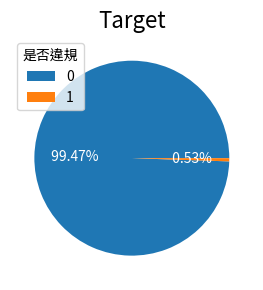

In [ ]:
# plot data
pieData = y_train.value_counts()
pie_label = np.array(pieData.index).astype(np.str_)
pie_size = pieData.values

# plot
fig, ax = plt.subplots(figsize=(3, 3))

wedges, texts, autotexts= ax.pie(
    x=pie_size, 
    autopct=lambda pct: f'{pct: .2f}%',    # use f-string by lambda function
    textprops=dict(color='w')
)
# wedges: 扇形物件，調整扇形參數
# texts: 設定 labels 產生的文字物件
# autotexts: 設定 autopct 產生的文字物件

ax.legend(
    handles=wedges,    # list of Artist
    labels=list(pie_label),    # list of str
    title = '是否違規', 
    # loc = 'center right', 
    # bbox_to_anchor = (1, 0.5)
)

ax.set_title('Target', fontsize=16)

# show
fig.tight_layout()
plt.show()

In [28]:
list(pie_label)

[np.str_('0'), np.str_('1')]

### Handling Imbalanced Datasets
以 SMOTENC 進行資...

In [ ]:
# 先將數值資料轉為 float ，合成樣本後再四捨五入，避免向零截斷（truncation toward zero）
cols_num = ['資本額', '餐飲業次業別數', '標章分數', '場所規模']
X_sm0 = pd.concat([X_train[cols_num].astype('float32'), X_train.drop(cols_num, axis=1)], axis=1)